# 10. Logistic Regression

## 10.2 Binary logistic regression

### 10.2.7 MAP estimation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_predictions(ax, xx, yy, transformer, model):
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid2 = transformer.transform(grid)[:, 1:]
    Z = model.predict(grid2).reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.5)

def plot_data(ax, X, y, is_train=True):
    X0 = X[:, 0]
    X1 = X[:, 1]
    markers = ['b*', 'rx'] if is_train else ['bs', 'ro']
    ax.plot(X[y == 0, 0], X[y == 0, 1], markers[0], label="Class {0}")
    ax.plot(X[y == 1, 0], X[y == 1, 1], markers[1], label="Class {1}")
    ax.set_ylim(-2.75, 2.75)
    ax.legend(loc='upper right')
    ax.set_xlabel('$x_{0}$')
    ax.set_ylabel('$x_{1}$')

n_train, n_test = 50, 1000
n_samples = n_train + n_test

from sklearn.datasets import make_classification
X, y = make_classification(
    n_samples=n_samples, n_features=2, n_redundant=0, n_classes=2,
    n_clusters_per_class=2, class_sep=0.1, random_state=1
)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=n_train, test_size=n_test, shuffle=False
)

n_grid = 200
xmin, ymin = X.min(axis=0)
xmax, ymax = X.max(axis=0)
xx, yy = np.meshgrid(
    np.linspace(xmin, xmax, n_samples), np.linspace(ymin, ymax, n_grid)
)
xx.shape, yy.shape

((200, 1050), (200, 1050))

In [3]:
# Generate a new feature matrix consisting of all polynomial combinations of
# the features with degree less than or equal to the specified degree.
# e.g., if an input sample is two dimensional and of the form [a, b],
# the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
from sklearn.preprocessing import PolynomialFeatures
transformer = PolynomialFeatures(degree=4)
X_train_poly_feature = transformer.fit_transform(X_train)[:, 1:] # except for const
X_train.shape,  X_train_poly_feature.shape

((50, 2), (50, 14))

In [4]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=10) # regularization only
clf.fit(X_train_poly_feature, y_train)
clf.score(X_train_poly_feature, y_train)

0.8

### Figure 10.4: Polynomial feature expansion applied to a two-class, two-dimensional logistic regression problem. (a) Degree $K=1$. (b) Degree $K=2$. (c) Degree $K=4$. (d) Train and test error vs degree.

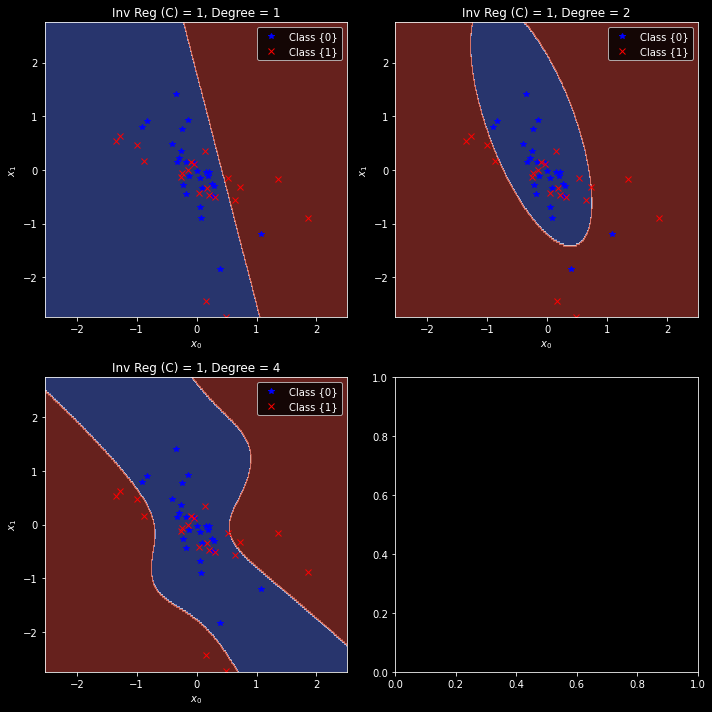

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axes = axes.ravel()

plot_list_K = [1, 2, 4]
for K, ax in zip(plot_list_K, axes[:3]):
    transformer = PolynomialFeatures(degree=K)
    clf = LogisticRegression(C=1)
    clf.fit(transformer.fit_transform(X_train)[:, 1:], y_train)
    plot_predictions(ax, xx, yy, transformer, clf)
    plot_data(ax, X_train, y_train)
    ax.set_title(f"Inv Reg (C) = 1, Degree = {K:d}")
fig.tight_layout()

### Figure 10.6: Weight decay with variance $C$ applied to a two-class, two-dimensional logistic regression problem with a degree 4 polynomial. (a) $C=1$. (b) $C=316. (c) $C=100,000$. (d) Train and test error vs $C$.

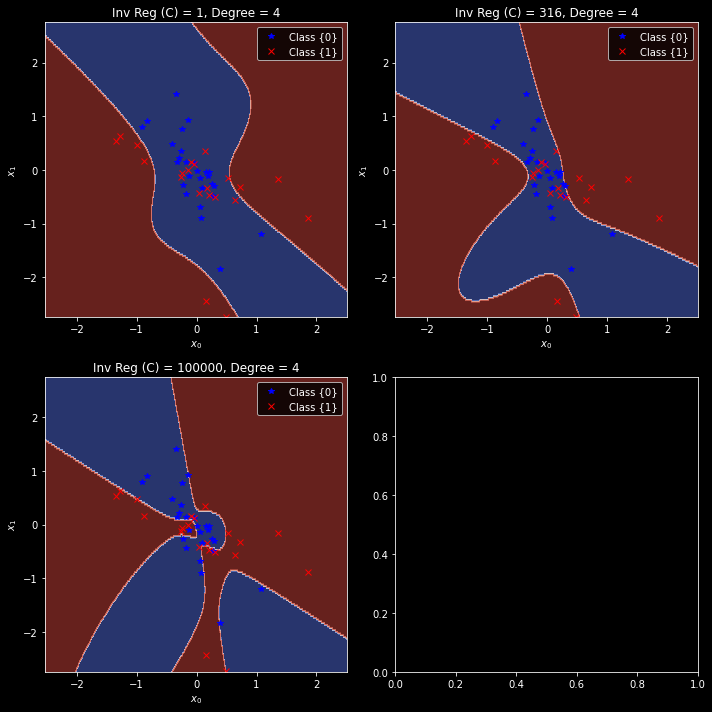

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axes = axes.ravel()

plot_list_C = [1, 316, 100000]
for C, ax in zip(plot_list_C, axes[:3]):
    transformer = PolynomialFeatures(degree=4)
    clf = LogisticRegression(C=C, max_iter=1000)
    clf.fit(transformer.fit_transform(X_train)[:, 1:], y_train)
    plot_predictions(ax, xx, yy, transformer, clf)
    plot_data(ax, X_train, y_train)
    ax.set_title(f"Inv Reg (C) = {C:d}, Degree = 4")
fig.tight_layout()

In [ ]:
model = model.fit(Xtrain_poly_feature, ytrain)
weight = model.coef_[0]
weights_list.append(weight)
ytrain_pred = model.predict(Xtrain_poly_feature)
nerrors_train = jnp.sum(ytrain_pred != ytrain)
err_train_list.append(nerrors_train / ntrain)
Xtest_poly_feature = transformer.fit_transform(Xtest)[:, 1:]
ytest_pred = model.predict(Xtest_poly_feature)
nerrors_test = jnp.sum(ytest_pred != ytest)
err_test_list.append(nerrors_test / ntest)

if int(C) in plot_list_C:

    fig, ax = plt.subplots()
    name = "Inv Reg (C) = {:d}, Degree = {}".format(int(C), degree)
    plot_predictions(ax, xx, yy, transformer, model)
    plot_data(ax, Xtrain, ytrain, is_train=True)
    ax.set_title(name)

In [4]:
def plot_data(ax, X, y, is_train=True):
    X0 = X[:, 0]
    X1 = X[:, 1]
    colors = ["blue", "red"]
    if is_train:
        markers = ["*", "x"]
    else:
        markers = ["s", "o"]
    for i in range(0, 2):
        ax.plot(
            X[y == i, 0], X[y == i, 1], color=colors[i], marker=markers[i], linestyle="None", label="Class {}".format(i)
        )
    ax.set_ylim(-2.75, 2.75)
    plt.legend(loc="upper right")
    plt.xlabel("$x_{0}$")
    plt.ylabel("$x_{1}$")
    sns.despine()

In [5]:
def plot_predictions(ax, xx, yy, transformer, model):
    grid = jnp.c_[xx.ravel(), yy.ravel()]
    grid2 = transformer.transform(grid)[:, 1:]
    Z = model.predict(grid2).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.55)

In [7]:
def train_plot():
    C_list = jnp.logspace(0, 5, 7)
    degree = 4
    plot_list_C = [1, 316, 100000]
    err_train_list = []
    err_test_list = []
    weights_list = []
    for i, C in enumerate(C_list):
        transformer = PolynomialFeatures(degree)
        Xtrain_poly_feature = transformer.fit_transform(Xtrain)[:, 1:]
        model = LogisticRegression(C=int(C))
        model = model.fit(Xtrain_poly_feature, ytrain)
        weight = model.coef_[0]
        weights_list.append(weight)
        ytrain_pred = model.predict(Xtrain_poly_feature)
        nerrors_train = jnp.sum(ytrain_pred != ytrain)
        err_train_list.append(nerrors_train / ntrain)
        Xtest_poly_feature = transformer.fit_transform(Xtest)[:, 1:]
        ytest_pred = model.predict(Xtest_poly_feature)
        nerrors_test = jnp.sum(ytest_pred != ytest)
        err_test_list.append(nerrors_test / ntest)

        if int(C) in plot_list_C:

            fig, ax = plt.subplots()
            name = "Inv Reg (C) = {:d}, Degree = {}".format(int(C), degree)
            plot_predictions(ax, xx, yy, transformer, model)
            plot_data(ax, Xtrain, ytrain, is_train=True)
            ax.set_title(name)
            savefig("log_reg_poly_InvReg_{:d}_deg_{:d}".format(int(C), degree))
            plt.draw()

    plt.figure()
    plt.plot(C_list, err_train_list, "x-", label="Train")
    plt.plot(C_list, err_test_list, "o-", label="Test")
    plt.legend()
    plt.xscale("log")
    plt.ylim(0, 0.5)
    plt.xlabel("Inverse regularization (C)")
    plt.title("Train and Test Error v/s C")
    plt.ylabel("Error Rate")

    sns.despine()
    savefig("Train & Test Error vs C,degree_{}".format(degree))
    plt.show()

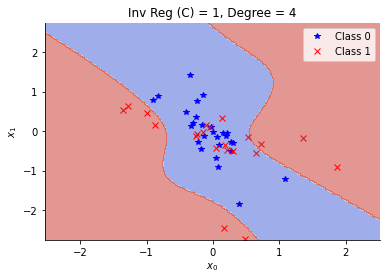

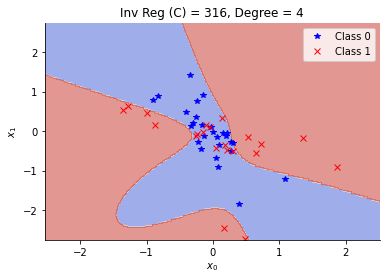

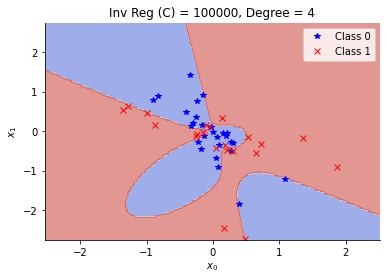

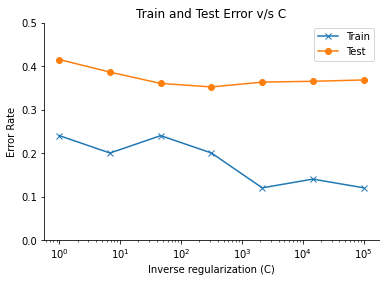

In [8]:
train_plot()